In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score
import seaborn as sns # enhanced data visualization, specifically used for the heatmap of the confusion matrix.
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/pose_detection/pose_data.csv')

data['label'] = data['label'].map({'fall':1, 'adl':0}) # performs label encoding. convert the categorical 'label' column ('fall', 'adl') into numerical labels

# drop the image_path column as it is not a feature
data = data.drop(columns=['image_path'])

X = data.drop(columns=['label']) # input variables (pose landmarks) that the model will use for learning.
y = data['label']

print(f'this is the X: {X.shape}')

this is the X: (8814, 132)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [ ]:
classif = XGBClassifier(
    n_estimators = 100, # number of boosting rounds
    max_depth = 5, # maximum depth of each tree
    learning_rate = 0.05,
    eval_metric = "logloss", # Logarithmic Loss) is a effective evaluation metric for classification problems, especially binary classification.
    random_state = 42
)

classif.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [ ]:
y_pred = classif.predict(X_test)
print(f'classification report: .\n {classification_report(y_test, y_pred)}')

classification report: .
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      1257
           1       1.00      0.99      0.99       506

    accuracy                           0.99      1763
   macro avg       1.00      0.99      0.99      1763
weighted avg       0.99      0.99      0.99      1763



In [ ]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
model1_accuracy = cross_val_score(classif, X_train, y_train, cv = kfold, scoring="accuracy")
print(f"Accuracy: {np.mean(model1_accuracy):.3f} ± {np.std(model1_accuracy):.3f}")


Accuracy: 0.995 ± 0.001


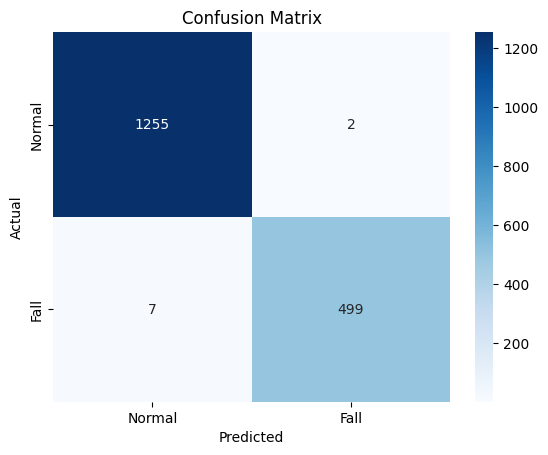

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,
            annot=True, # display the numerical values in each cell.
            fmt='d',#format the annotations as integers.
            cmap='Blues',
            xticklabels=['Normal', 'Fall'],
            yticklabels=['Normal', 'Fall'])

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
import joblib
joblib.dump(classif, 'fall_detection_model_v2.pkl')

['fall_detection_model_v2.pkl']